In [57]:

import os
from spectral import *
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget 
# %matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import datasets
matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (20, 12)
os.chdir(sys.path[0])
os.getcwd()

'c:\\Users\\wb8by\\Documents\\NINJA\\cNinja'

In [58]:
lib = envi.open('data\\full_vnir_refl.hdr')
nSpec = len(lib.names)
nBands = len(lib.bands.centers)
print('Number of Spectra: '+str(nSpec))
print('Number of Bands: '+str(nBands))

Number of Spectra: 11958
Number of Bands: 4401


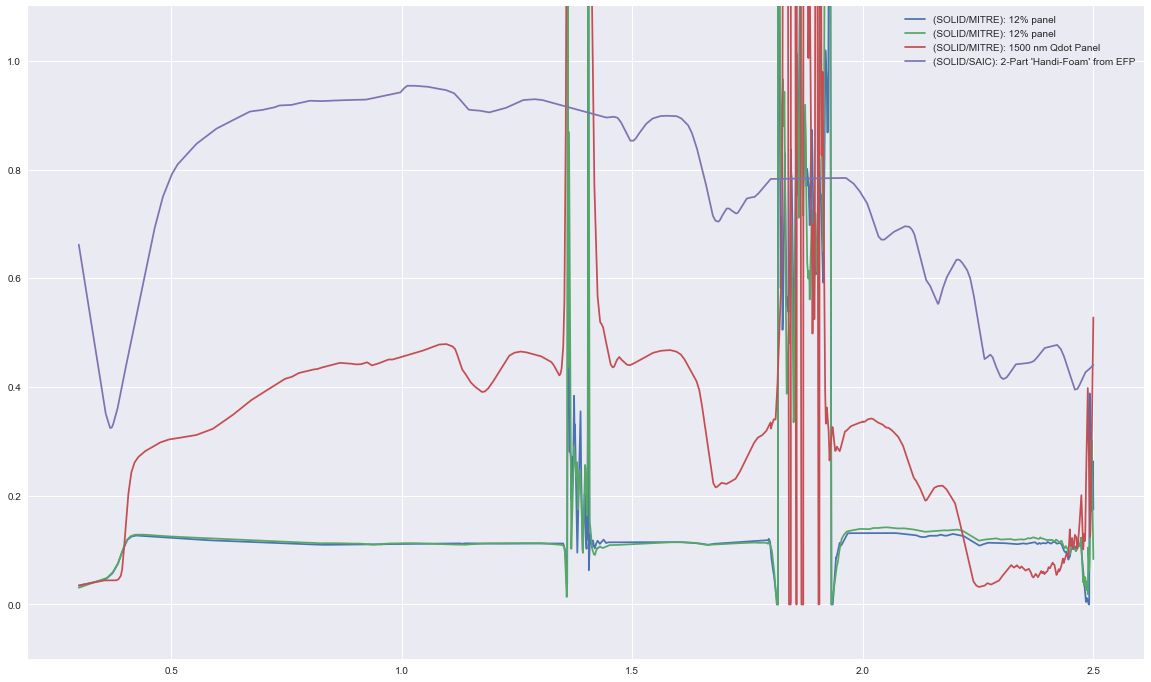

In [59]:
for i in range(4):
    plt.plot(lib.bands.centers, lib.spectra[i,:], label=lib.names[i])
plt.ylim(-0.1,1.1)
plt.legend();

In [60]:
left = np.argmin(np.abs(np.asarray(lib.bands.centers)-1.776)) 
left2 = np.argmin(np.abs(np.asarray(lib.bands.centers)-1.8)) 
right = np.argmin(np.abs(np.asarray(lib.bands.centers)-2)) 
print([left,left2,right])

[2952, 3000, 3400]


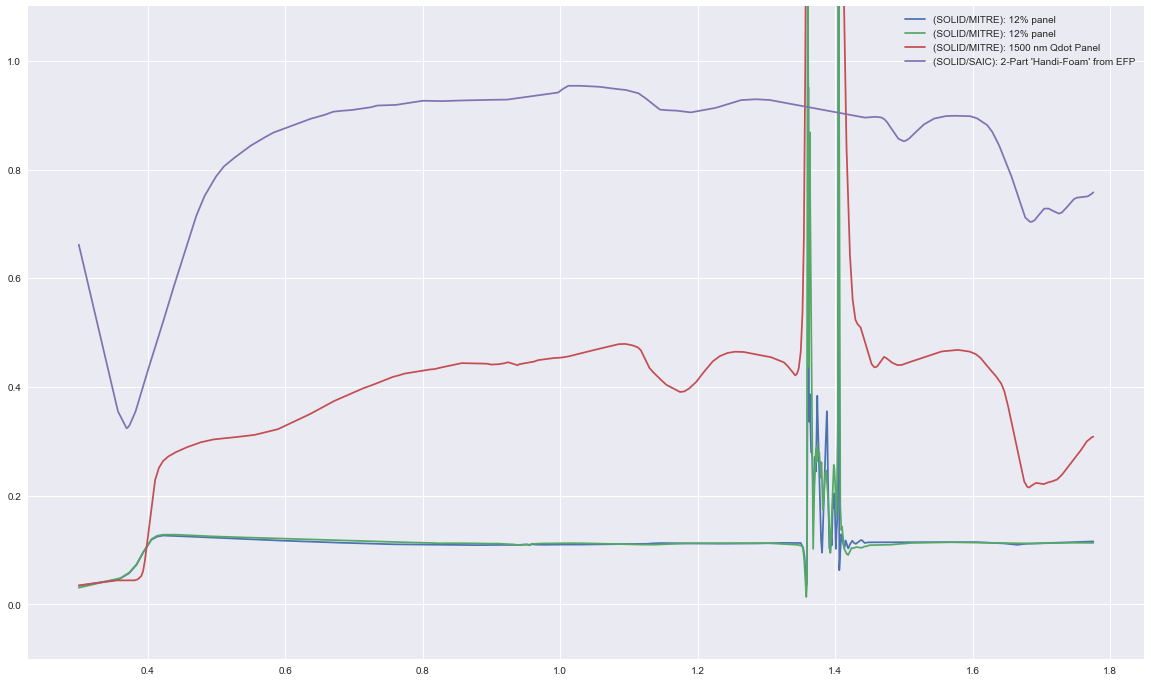

In [61]:
for i in range(4):
    plt.plot(lib.bands.centers[0:left], lib.spectra[i,0:left], label=lib.names[i])
plt.ylim(-0.1,1.1)
plt.legend();

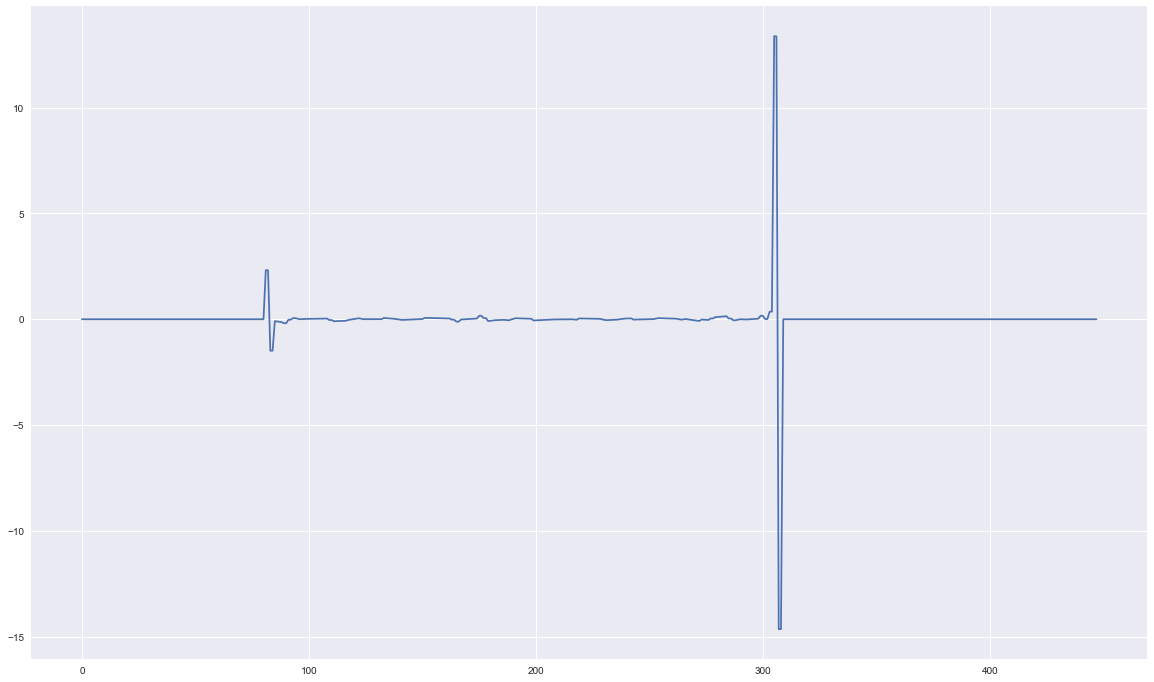

In [62]:
plt.plot(lib.spectra[1,left:right]-lib.spectra[1,(left-1):(right-1)])

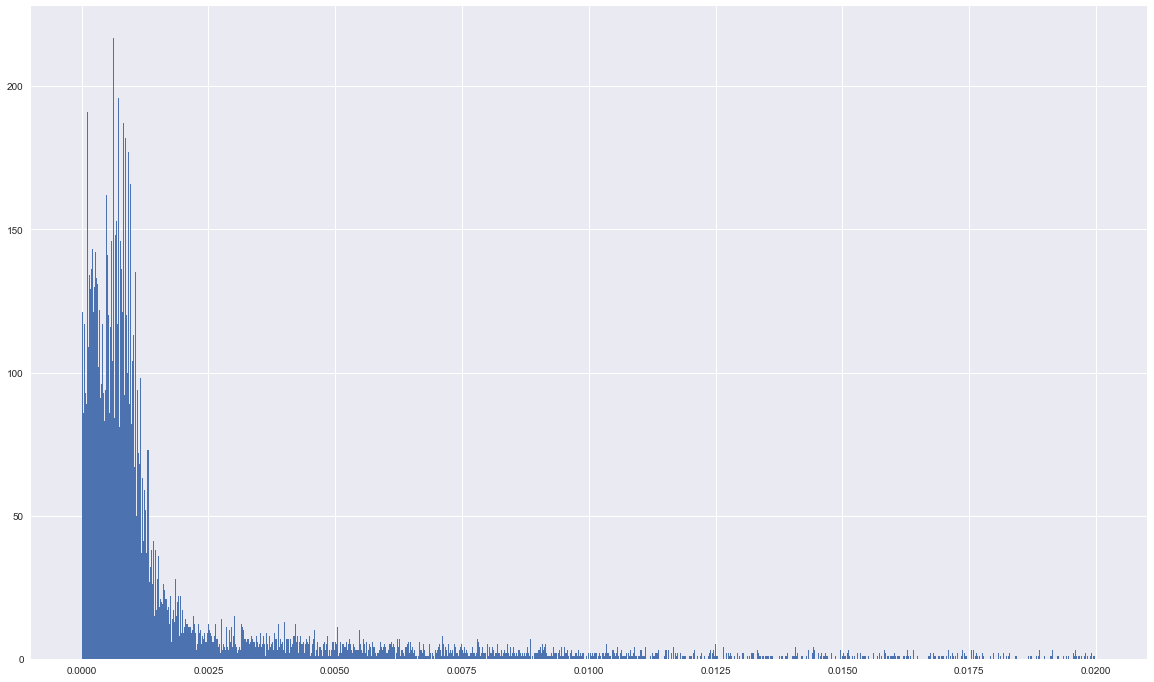

In [63]:
s = np.zeros(nSpec)
for i in range(nSpec):
    s[i] = np.max(lib.spectra[i,left:right]-lib.spectra[i,(left-1):(right-1)])
plt.hist(s, bins=1000, range=[0,0.02]);

In [64]:
data = lib.spectra[np.where(s<0.0025)[0],:]
datas = s[np.where(s<0.0025)[0]]
idx = np.argsort(datas)[::-1]
data = data[idx,:]
datas = datas[idx]
data_bad = lib.spectra[np.where(s>0.05)[0],:]

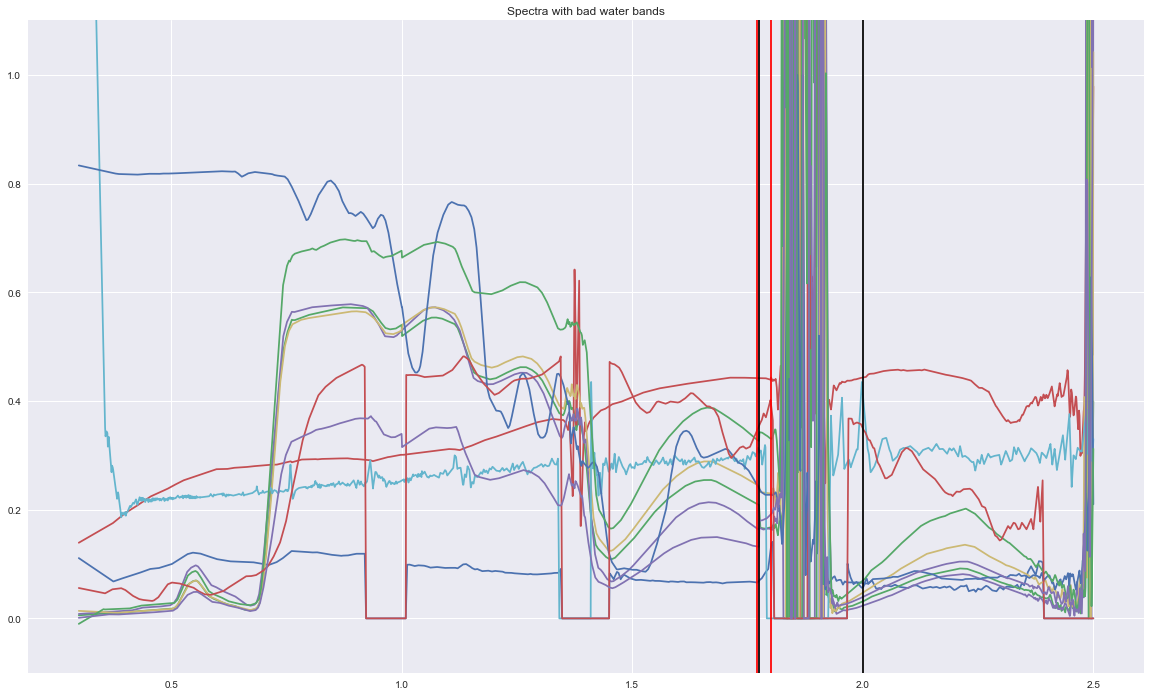

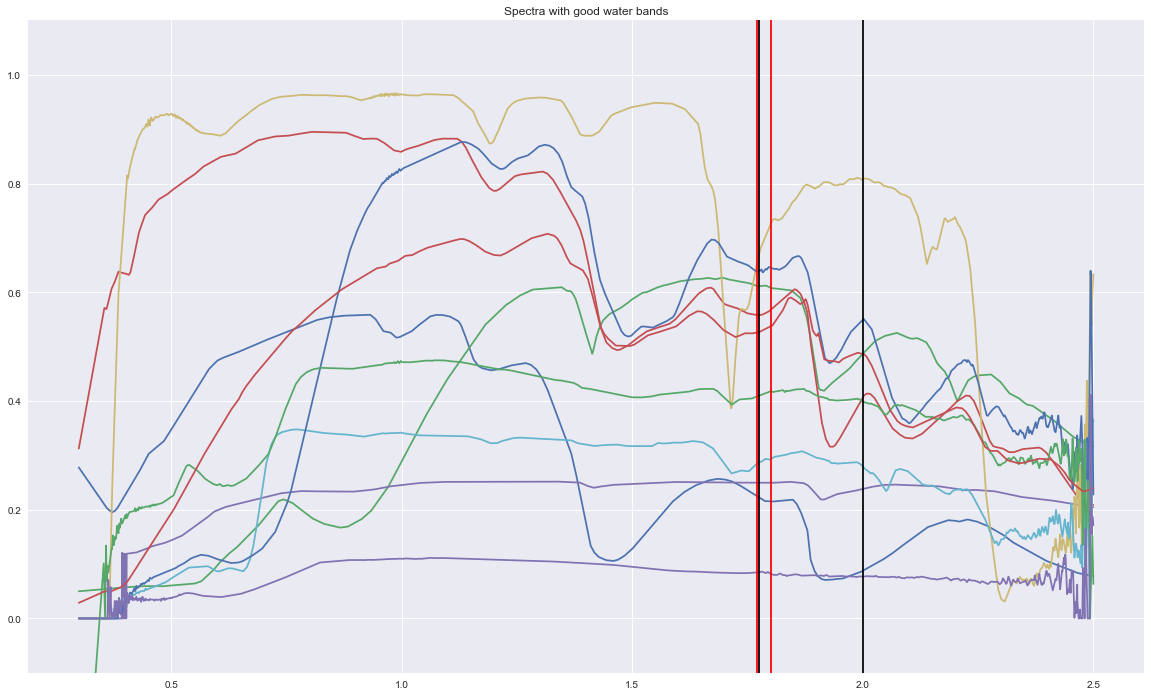

In [65]:
plt.figure()
for i in range(10):
    j = np.random.randint(1, data_bad.shape[0])
    plt.plot(lib.bands.centers, data_bad[j,:])
plt.ylim(-0.1,1.1)
plt.axvline(x = lib.bands.centers[left], color = 'k')
plt.axvline(x = lib.bands.centers[left-10], color = 'r')
plt.axvline(x = lib.bands.centers[left2], color = 'r')
plt.axvline(x = lib.bands.centers[right], color = 'k')
plt.title('Spectra with bad water bands');
plt.figure()
for i in range(10):
    j = np.random.randint(1, data.shape[0])
    plt.plot(lib.bands.centers, data[j,:])
plt.ylim(-0.1,1.1)
plt.axvline(x = lib.bands.centers[left], color = 'k')
plt.axvline(x = lib.bands.centers[left-10], color = 'r')
plt.axvline(x = lib.bands.centers[left2], color = 'r')
plt.axvline(x = lib.bands.centers[right], color = 'k')
plt.title('Spectra with good water bands');

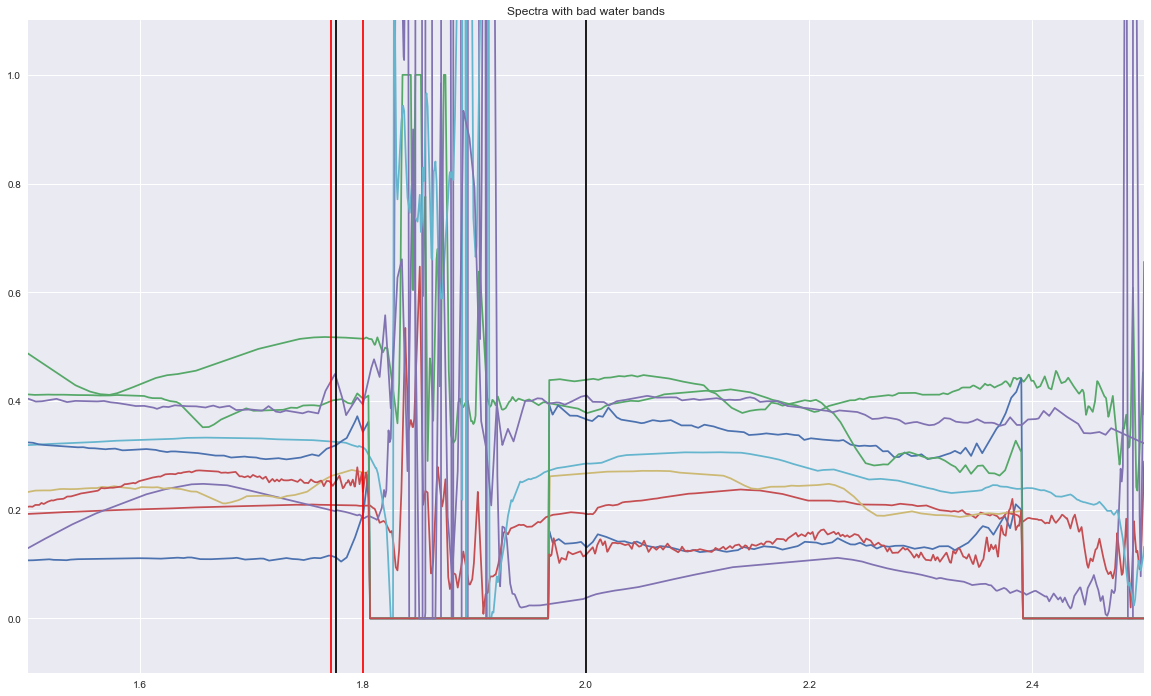

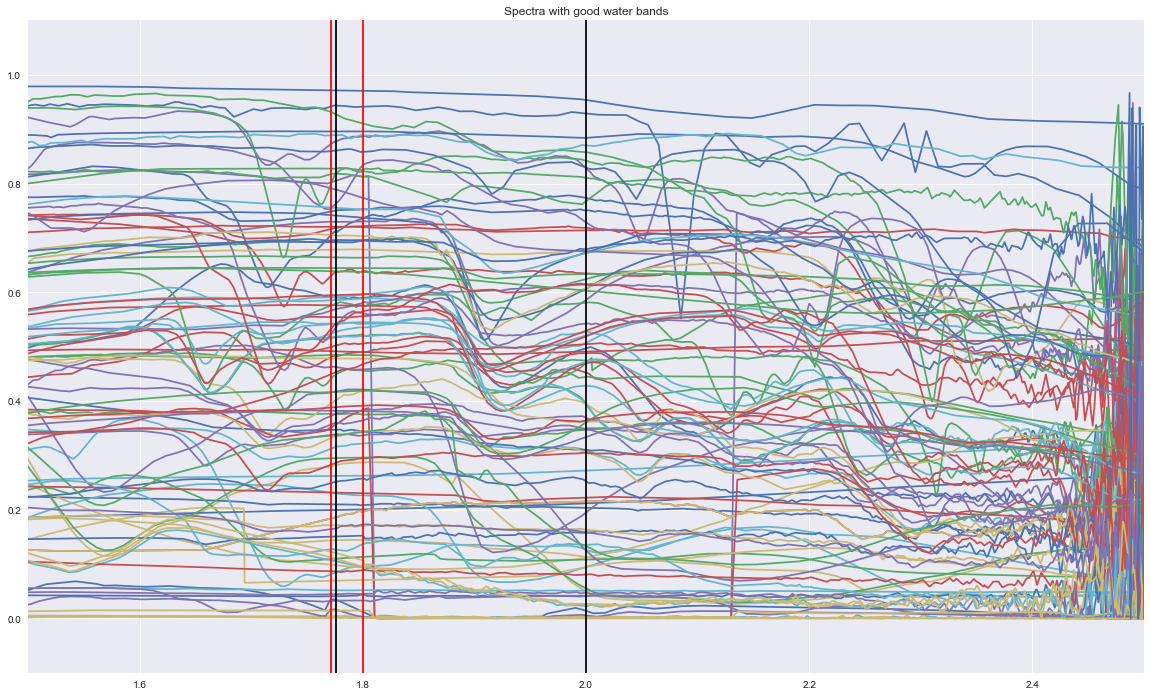

In [66]:
plt.figure()
for i in range(10):
    j = np.random.randint(1, data_bad.shape[0])
    plt.plot(lib.bands.centers, data_bad[j,:])
plt.ylim(-0.1,1.1)
plt.xlim(1.5,2.5)
plt.axvline(x = lib.bands.centers[left], color = 'k')
plt.axvline(x = lib.bands.centers[left-10], color = 'r')
plt.axvline(x = lib.bands.centers[left2], color = 'r')
plt.axvline(x = lib.bands.centers[right], color = 'k')
plt.title('Spectra with bad water bands');
plt.figure()
for i in range(100):
    j = np.random.randint(1, data.shape[0])
    plt.plot(lib.bands.centers, data[j,:])
plt.ylim(-0.1,1.1)
plt.xlim(1.5,2.5)
plt.axvline(x = lib.bands.centers[left], color = 'k')
plt.axvline(x = lib.bands.centers[left-10], color = 'r')
plt.axvline(x = lib.bands.centers[left2], color = 'r')
plt.axvline(x = lib.bands.centers[right], color = 'k')
plt.title('Spectra with good water bands');

In [67]:
Idx = np.concatenate([np.linspace(left-100,left,101),np.linspace(right,right+100,101)]).astype(int)
Idx

array([2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862,
       2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873,
       2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884,
       2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895,
       2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906,
       2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917,
       2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928,
       2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939,
       2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950,
       2951, 2952, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408,
       3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419,
       3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430,
       3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441,
       3442, 3443, 3444, 3445, 3446, 3447, 3448, 34

In [68]:
xwl = lib.bands.centers

In [69]:
x = data[:,Idx]
xwl = np.asarray(lib.bands.centers)[Idx]
y = data[:,left:right]
ywl =  np.asarray(lib.bands.centers[left:right])
# test:
xt = data[:,left]
yt = data[:,left2]
xtb = data_bad[:,left]
ytb = data_bad[:,left2]

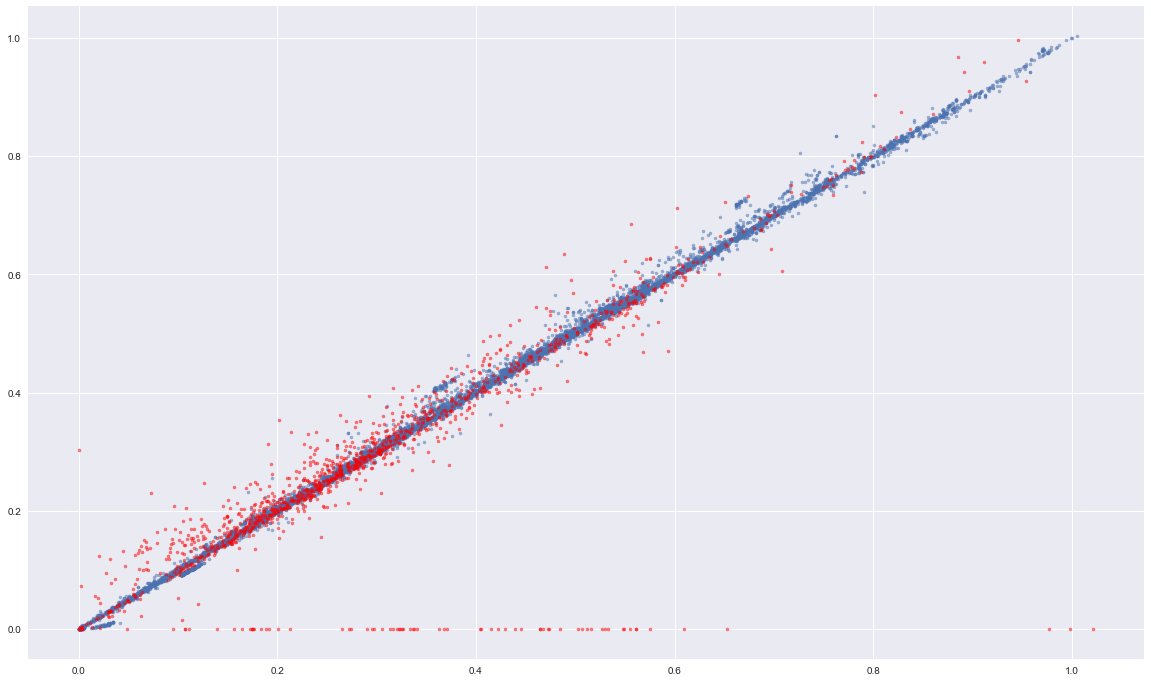

In [70]:
plt.scatter(xt,yt, alpha=0.5, s=10)
plt.scatter(xtb,ytb, c='r', alpha=0.5, s=10)

In [81]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`
    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    print(cov)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = matplotlib.patches.Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = matplotlib.transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

[[0.05341746 0.05372116]
 [0.05372116 0.05411279]]
[[0.03087898 0.02661281]
 [0.02661281 0.03301398]]


(-0.1, 1.1)

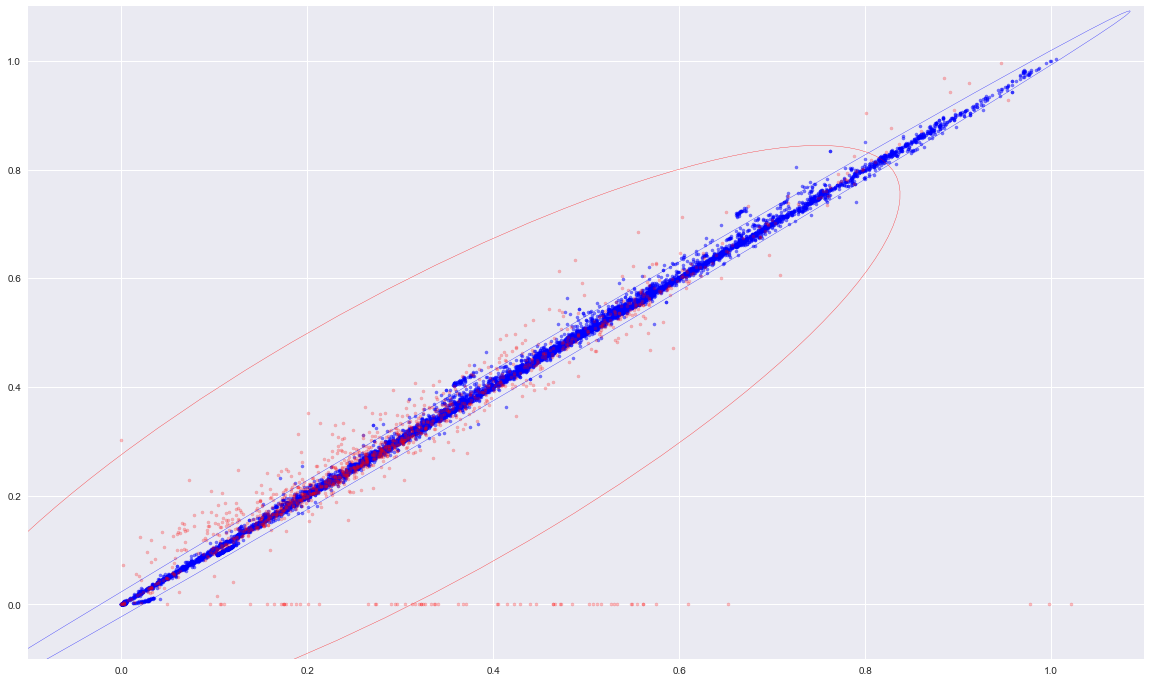

In [82]:
fig, ax = plt.subplots()
plt.scatter(xt,yt, c='b', alpha=0.5, s=10)
plt.scatter(xtb,ytb, c='r', alpha=0.25, s=10)
confidence_ellipse(xt, yt, ax, edgecolor='b')
confidence_ellipse(xtb, ytb, ax, edgecolor='r')
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)

In [88]:
np.linalg.eig(np.cov(xt,yt))[0]

array([4.28408351e-05, 1.07487411e-01])

In [89]:
np.linalg.eig(np.cov(xtb,ytb))[0]

array([0.00531227, 0.05858069])

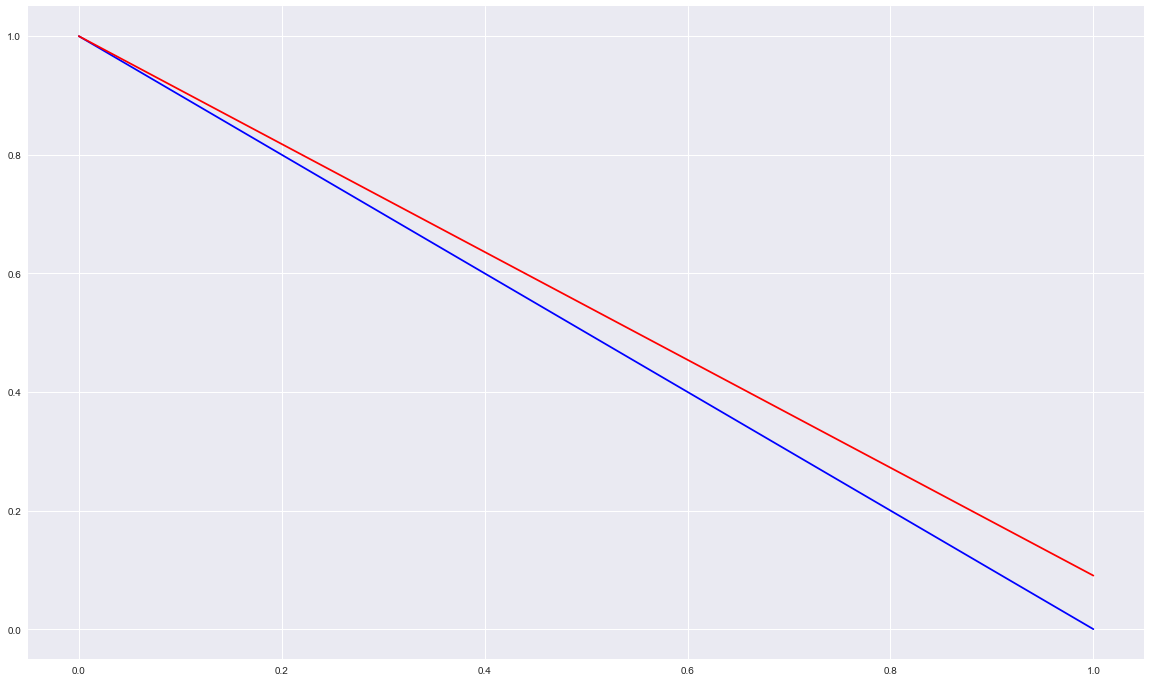

In [93]:
plt.plot(np.linalg.eig(np.cov(xt,yt))[0][::-1]/np.linalg.eig(np.cov(xt,yt))[0][1], 'b')
plt.plot(np.linalg.eig(np.cov(xtb,ytb))[0][::-1]/np.linalg.eig(np.cov(xtb,ytb))[0][1], 'r')

In [73]:
def predict(x,xwl,ywl,deg):
  p = np.polyfit(xwl, x, deg)
  return np.polyval(p, ywl)

In [74]:
yPred = predict(x[0],xwl,ywl,3)

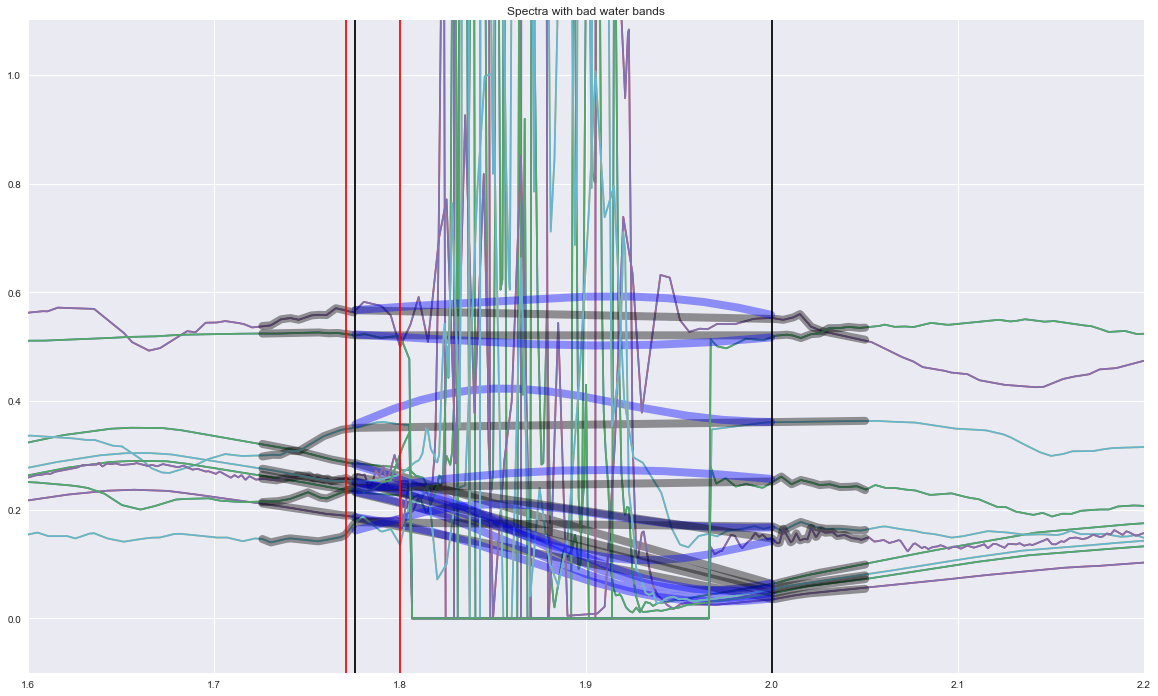

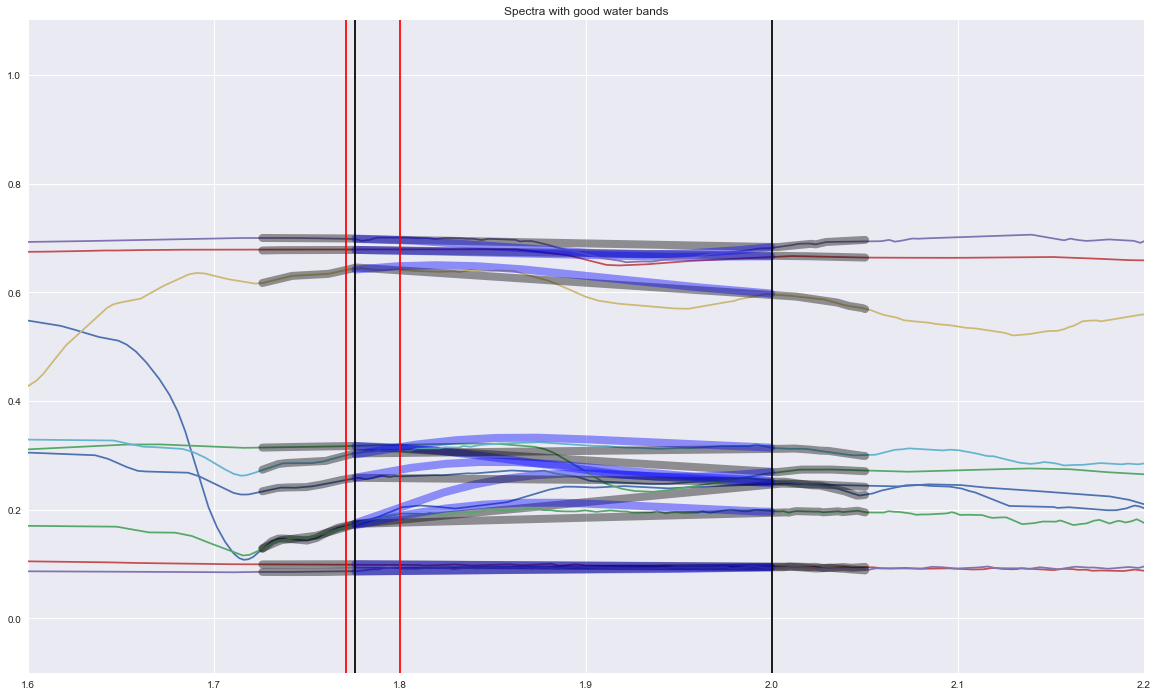

In [75]:
plt.figure()
for i in range(10):
    j = np.random.randint(1, data_bad.shape[0])
    plt.plot(lib.bands.centers, data_bad[j,:])
    x_temp = data_bad[j,Idx]
    yPred = predict(x_temp, xwl, ywl, 5)
    plt.plot(lib.bands.centers, data_bad[j,:])
    plt.plot(xwl, x_temp, alpha=0.4, linewidth=8, c='k')
    plt.plot(ywl, yPred, alpha=0.4, linewidth=8, c='b')
plt.ylim(-0.1,1.1)
plt.xlim(1.6,2.2)
plt.axvline(x = lib.bands.centers[left], color = 'k')
plt.axvline(x = lib.bands.centers[left-10], color = 'r')
plt.axvline(x = lib.bands.centers[left2], color = 'r')
plt.axvline(x = lib.bands.centers[right], color = 'k')
plt.title('Spectra with bad water bands');
plt.figure()
for i in range(10):
    j = np.random.randint(1, data.shape[0])
    x_temp = data[j,Idx]
    yPred = predict(x_temp, xwl, ywl, 5)
    plt.plot(lib.bands.centers, data[j,:])
    plt.plot(xwl, x_temp, alpha=0.4, linewidth=8, c='k')
    plt.plot(ywl, yPred, alpha=0.4, linewidth=8, c='b')
plt.ylim(-0.1,1.1)
plt.xlim(1.6,2.2)
plt.axvline(x = lib.bands.centers[left], color = 'k')
plt.axvline(x = lib.bands.centers[left-10], color = 'r')
plt.axvline(x = lib.bands.centers[left2], color = 'r')
plt.axvline(x = lib.bands.centers[right], color = 'k')
plt.title('Spectra with good water bands');

In [76]:
data[:,left:(left+10)].shape

(8439, 10)

In [85]:
C = np.cov(data[:,left:right].T)
C

array([[0.05341746, 0.0534317 , 0.05344629, ..., 0.05110273, 0.05111095,
        0.05111738],
       [0.0534317 , 0.05344607, 0.05346077, ..., 0.05112377, 0.05113196,
        0.05113835],
       [0.05344629, 0.05346077, 0.0534756 , ..., 0.05114512, 0.05115327,
        0.05115963],
       ...,
       [0.05110273, 0.05112377, 0.05114512, ..., 0.05611337, 0.05611936,
        0.05612371],
       [0.05111095, 0.05113196, 0.05115327, ..., 0.05611936, 0.05612556,
        0.05613009],
       [0.05111738, 0.05113835, 0.05115963, ..., 0.05612371, 0.05613009,
        0.05613483]])

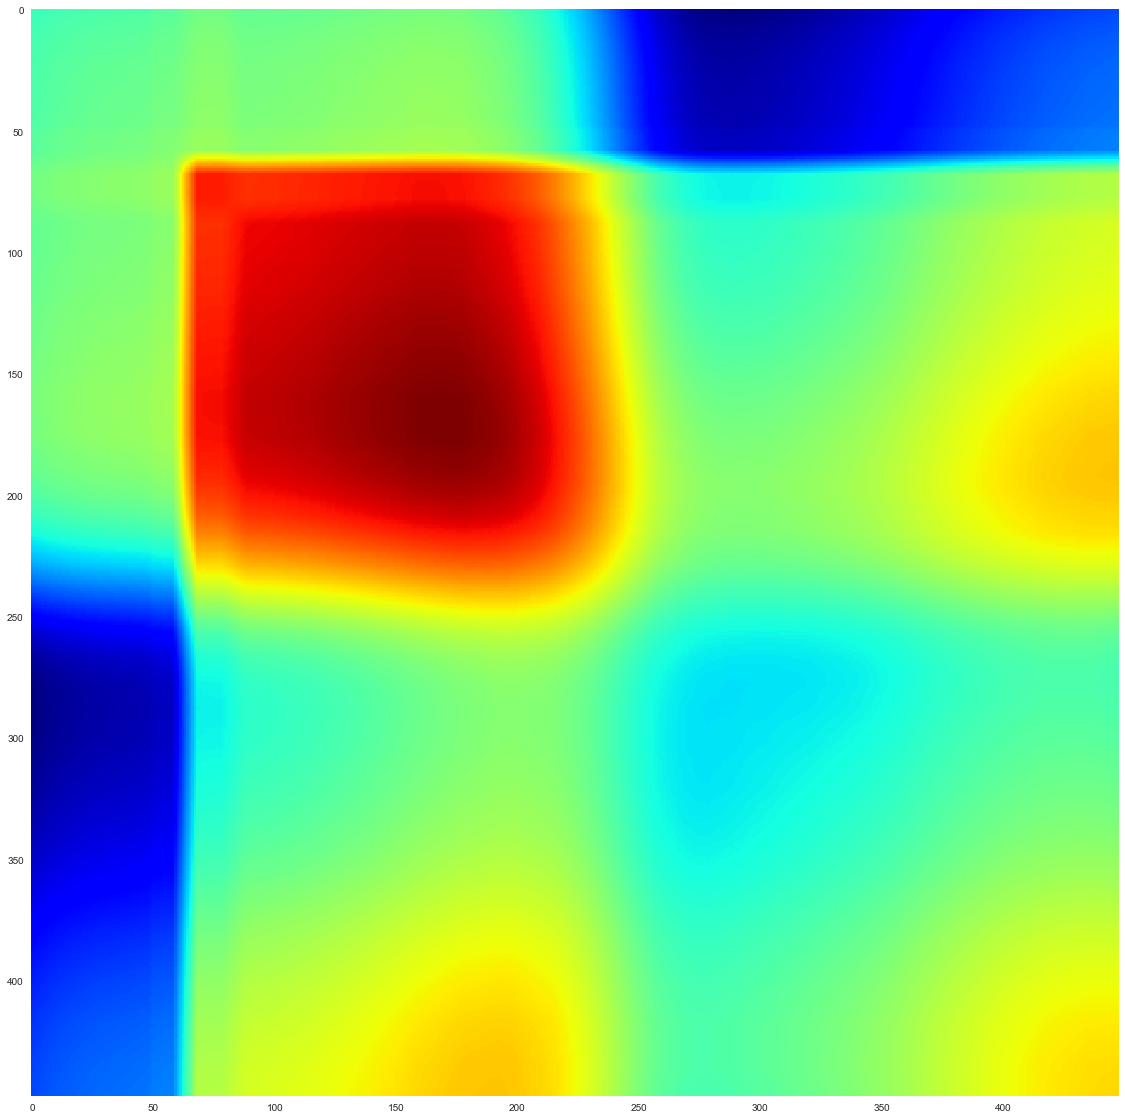

In [86]:
plt.figure(figsize = (20, 20))
plt.imshow(C, interpolation='nearest',cmap='jet')
plt.grid(None)

In [94]:
np.linalg.eig(C)[0]

array([2.43862477e+01, 4.08974494e-01, 1.34585675e-01, 3.74778683e-02,
       1.08976446e-02, 6.14795974e-03, 2.43151783e-03, 1.30647914e-03,
       6.09102548e-04, 4.49848737e-04, 3.70353913e-04, 2.59931375e-04,
       1.27271634e-04, 9.97773637e-05, 6.22836021e-05, 5.34175977e-05,
       4.50820715e-05, 4.44214742e-05, 3.15592966e-05, 2.85168346e-05,
       2.48108516e-05, 1.92761943e-05, 1.80225812e-05, 1.65768822e-05,
       1.47874133e-05, 1.22301382e-05, 1.06953259e-05, 9.40666791e-06,
       9.11261363e-06, 8.01842044e-06, 7.63500595e-06, 7.26724269e-06,
       6.44990283e-06, 6.16628558e-06, 5.73499696e-06, 5.53737968e-06,
       5.15737906e-06, 4.84502984e-06, 4.61000409e-06, 4.43713861e-06,
       4.04762808e-06, 3.72111075e-06, 3.30691299e-06, 3.07212337e-06,
       2.80565934e-06, 2.62731536e-06, 2.51844514e-06, 2.40910252e-06,
       2.38797612e-06, 2.14609726e-06, 1.94549308e-06, 1.81612925e-06,
       1.67265488e-06, 1.60613234e-06, 1.53299008e-06, 1.48101599e-06,
      

(0.0, 1.0)

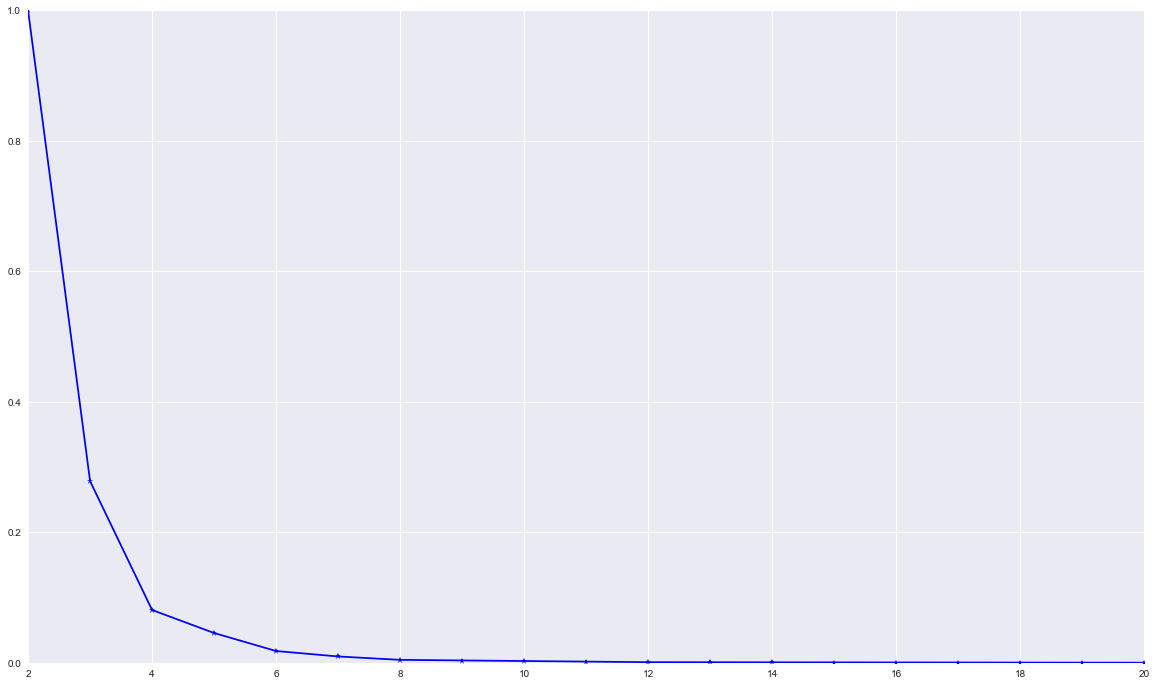

In [107]:
plt.plot(np.linalg.eig(C)[0]/np.linalg.eig(C)[0][2], 'b*-')
plt.xlim([2,20])
plt.ylim([0,1])